# I-94 Traffic
The aim of this analysis is to find key indicators/predictors for heavy traffic on I-94 West.

## Importing data and necessary libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic = pd.read_csv('Datasets/Metro_Interstate_Traffic_Volume.csv')
display(traffic.head())
display(traffic.tail())
traffic.info()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Cleaning and formatting data
Let's change the `date_time` column into datetime objects

In [106]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
hour = traffic['date_time'].dt.hour
daytime_traffic = traffic[hour.between(7,18)]
nighttime_traffic = traffic[hour.between(19,23)+hour.between(0,6)]

## Exploratory data analysis

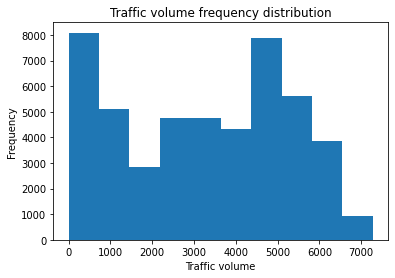

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [107]:
traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic volume')
plt.title('Traffic volume frequency distribution')
plt.show()

traffic['traffic_volume'].describe()

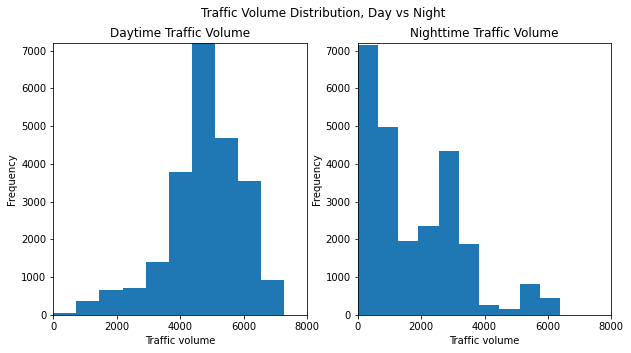

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [108]:
plt.figure(figsize = [10,5])
plt.suptitle('Traffic Volume Distribution, Day vs Night')
xlim = [0,8000]
xticks = [0,2000,4000,6000,8000]
ylim = [0,7200]

plt.subplot(1,2,1)
daytime_traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic volume')
plt.title('Daytime Traffic Volume')
plt.xlim(xlim)
plt.xticks(xticks)
plt.ylim(ylim)

plt.subplot(1,2,2)
nighttime_traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic volume')
plt.title('Nighttime Traffic Volume')
plt.xlim(xlim)
plt.xticks(xticks)
plt.ylim(ylim)
plt.show()

display(daytime_traffic['traffic_volume'].describe())
display(nighttime_traffic['traffic_volume'].describe())

Seems like the bulk of the heavy traffic happens during daytime and not nighttime. As a result, we should pay special attention to the `daytime_traffic` dataset moving forward. One possibly good predictor of traffic volume is the month in the year. Let's see if we notice any interesting patterns between the month and traffic volume.

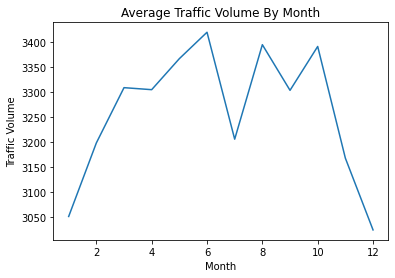

In [109]:
traffic['month'] = traffic['date_time'].dt.month
by_month = traffic.groupby('month').mean()
by_month['traffic_volume']

plt.plot(by_month.index, by_month['traffic_volume'])
plt.title('Average Traffic Volume By Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

For some reason, it looks like traffic abruptly drops in July, and is generally lower in December/January, probably because of the holiday season. Another possibly good predictor of traffic is day of the week. Let's examine what that relationship looks like.

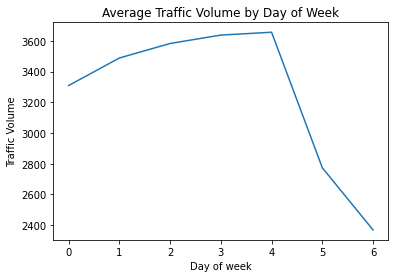

In [110]:
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek
by_dayofweek = traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

plt.plot(by_dayofweek.index, by_dayofweek['traffic_volume'])
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Traffic Volume')
plt.show()

Overall, looks like traffic monotonically increases from Monday thru Friday, and then sharply dips during the weekend. We can safely say that traffic is overall lower on the weekend than during the weekdays. Now let's examine the effect that the time of day has on the traffic volume. Before we do this, given we know that traffic is overall lower on the weekends, let's split the dataset into weekdays and weekend.

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


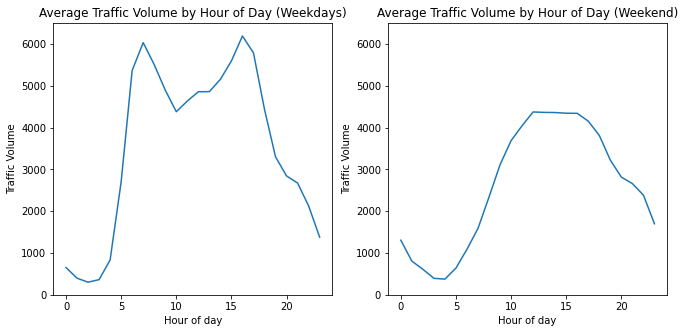

In [111]:
traffic['hour'] = traffic['date_time'].dt.hour
bussiness_days = traffic.copy()[traffic['dayofweek'] <= 4] # 4 == Friday
weekend = traffic.copy()[traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

plt.figure(figsize = [11,5])
plt.subplot(1,2,1)
plt.plot(by_hour_business.index, by_hour_business['traffic_volume'])
plt.title('Average Traffic Volume by Hour of Day (Weekdays)')
plt.xlabel('Hour of day')
plt.ylabel('Traffic Volume')
plt.ylim([0,6500])

plt.subplot(1,2,2)
plt.plot(by_hour_weekend.index, by_hour_weekend['traffic_volume'])
plt.title('Average Traffic Volume by Hour of Day (Weekend)')
plt.xlabel('Hour of day')
plt.ylabel('Traffic Volume')
plt.ylim([0,6500])

plt.show()

As expected, the overall traffic on weekdays is more than on weekends. Looks like the weekdays graph is bimodal in shape. This is quite likely due to rush hour periods--first is from ~6am to 9am, second is from around 3pm-5pm. On the weekends however, looks like the bulk of traffic happens in the middle of the day, and is higher at night compared to on weekdays, probably because people are going out on weekends.
***
So far we've found 3 indicators for heavy traffic:
* **Month:** During holiday season (December and January) as well as July, traffic is generally lower compared to other months.
* **Day of the week:** Traffic is generally higher between Monday and Friday (inclusive), and generally lower on weekends
* **Hour of the day:** On weekdays, traffic is generally higher during rush hours (6am-9am and 3pm-5pm) than the rest of the day. On weekends, traffic is usually higher towards the middle of the day than the rest of the day. Additionally, night traffic during the weekend is generally higher than night traffic during the weekdays.

In [112]:
traffic['traffic_volume'].corr(traffic['temp'])
display(traffic.corr())
traffic.corr().loc[['temp','rain_1h','snow_1h','clouds_all'],'traffic_volume']

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299,0.223738,-0.007708,0.112089
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714,0.001298,-0.006920,0.003421
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733,0.020412,-0.014928,0.009849
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054,-0.009133,-0.039715,0.054418
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000,-0.002533,-0.149544,0.352401
month,0.223738,0.001298,0.020412,-0.009133,-0.002533,1.000000,0.010741,0.001865
dayofweek,-0.007708,-0.006920,-0.014928,-0.039715,-0.149544,0.010741,1.000000,-0.003858
hour,0.112089,0.003421,0.009849,0.054418,0.352401,0.001865,-0.003858,1.000000


temp          0.130299
rain_1h       0.004714
snow_1h       0.000733
clouds_all    0.067054
Name: traffic_volume, dtype: float64

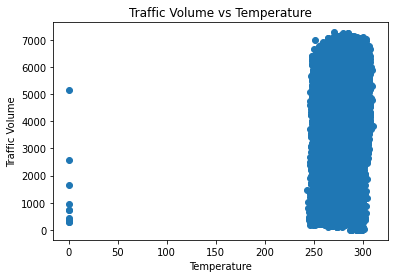

In [113]:
plt.scatter(traffic['temp'], traffic['traffic_volume'])
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume vs Temperature')
plt.show()

There seems to be a loose positive correlation between temperature and traffic volume. However, given how loose this correlation is, personally I don't think I'd use it as a predictor. Doesn't seem too reliable.

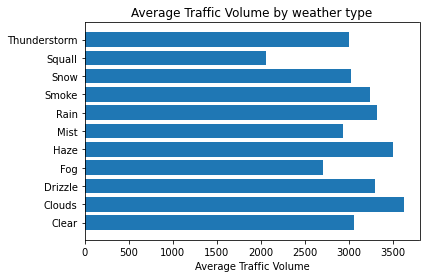

In [114]:
by_weather_main = traffic.groupby('weather_main').mean()
by_weather_description = traffic.groupby('weather_description').mean()

plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.xlabel('Average Traffic Volume')
plt.title('Average Traffic Volume by weather type')
plt.show()

There is no key relationship between traffic volume and type of weather. One thing that *might* be worth noting is that traffic is noticeably lower during squalls. However, there are no indicators here for heavy traffic.

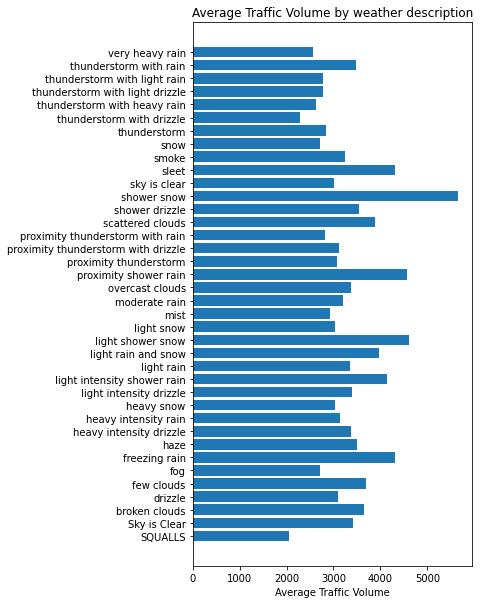

In [115]:
plt.figure(figsize=[5,10])
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.xlabel('Average Traffic Volume')
plt.title('Average Traffic Volume by weather description')
plt.show()

One noticeable pattern emerges: Traffic tends to be heavier during weather described as including "shower" and "snow". Note the bar height for "shower snow" and "light shower snow". This makes sense because people generally (should) drive slower in the snow.
***
All in all, we've found 4 indicators for heavy traffic:
* **Month:** During holiday season (December and January) as well as July, traffic is generally lower compared to other months.
* **Day of the week:** Traffic is generally higher between Monday and Friday (inclusive), and generally lower on weekends
* **Hour of the day:** On weekdays, traffic is generally higher during rush hours (6am-9am and 3pm-5pm) than the rest of the day. On weekends, traffic is usually higher towards the middle of the day than the rest of the day. Additionally, night traffic during the weekend is generally higher than night traffic during the weekdays.
* **Weather Description:** Traffic tends to be heavier during weather described as including snow showers.